In [1]:
import pandas as pd

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
path = './data/data_with_time_series.xlsx'
df = pd.read_excel(path)
df.shape

(3629, 30)

In [5]:
df.drop(['ART2DIA','BIS','ART2SYS','ART2MEAN','CVP','T2','ARTMEAN','RR','ARTDIA','ARTSYS','EtCO2','T1','NBPMEAN','HR'],inplace=True,axis=1)

In [6]:
df.shape

(3629, 16)

In [10]:
df_clear = df.drop(df[(df['NBPDIA'] == '0') & (df['NBPSYS'] == '0') & (df['PR'] == '0') & (df['SPO2'] == '0')].index)
df_clear.shape

(3583, 16)

In [77]:
df_spec = df[df['病区'] == '妇产科病区'].reset_index(drop=True)
# df_spec.head(3)
row = 4
data = df_spec.loc[row,'NBPDIA']
print(data)
print('----------')
data1 = df_spec.loc[row,'NBPSYS']
print(data1)
print('----------')
data2 = df_spec.loc[row,'SPO2']
print(data2)
print('----------')
data3 = df_spec.loc[row,'PR']
print(data3)

61 61 67 67 67 67 67 67 67 67 67 67 67 67 76 76 76 76 76 76 76 76 57 57 57 57 57 57 57 57 57 59 59 59 59 59 59 59 59 59 59 59 59 70 70 70 70 70 70 70 70 70 70 70 -100 -100 61 61 62 62 62 62 62 62 65 65 -102 -102 -102 -102 61 61 61 61 61 70 70 70 70 70 70 60 60 60 60 60 60 48 48 48 48 48 48 63 63 63 -102 -102 -102 63 67 67 67 67 67 -102 -102 67 -102 68 68 68 68 68 73 73 73 73 73 73 61 61 61 61 61 61 64 64 64 64 64 64 64 65 65 65 65 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 67 62 62 62 62 62 62 61 61 61 61 61 61 65 65 65 65 61 61 61 61 61 61 -102 -102 66 -102 -102 -102 -102 -102 -102 66
----------
110 110 116 116 116 116 116 116 116 116 116 116 116 116 130 130 130 130 130 130 130 130 102 102 102 102 102 102 102 102 102 103 103 103 103 103 103 103 103 103 103 103 103 107 107 107 107 107 107 107 107 107 107 107 -100 -100 116 116 116 116 116 116 116 116 110 110 -102 -102 -102 -102 111 111 111 111 111 119 119 119 119 119 119 120 120 120 120 120 120 92 92 92 92 92 92 110 110 110 -

In [93]:
def plot(data):
    with plt.style.context(['science','notebook']):
        plt.figure(figsize=(14,3))
        plt.plot(data,marker='o')
        plt.show()

# 将字符串序列变为数字序列
def toNumberList(s):
    return [float(c) for c in s.split(' ')]

# 通过移动平均法进行插值
def interpolation(s):
    arr = toNumberList(s)
    length = len(arr)
    ans = []
    for idx,val in enumerate(arr):
        if val > 0:
            ans.append(str(val))
        else:
            l = idx
            r = idx
            left = 0
            right = 0
            while l >= 0:
                if arr[l] > 0:
                    left = arr[l]
                    break
                else:
                    l -= 1
            while r < length:
                if arr[r] > 0:
                    right = arr[r]
                    break
                else:
                    r += 1
            ans.append(str(round((left + right) / 2,1)))
    return ' '.join(ans)

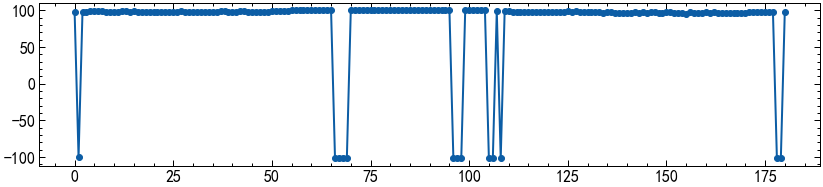

In [78]:
plot(toNumberList(data2))

In [94]:
print(data1)
print('-------')
print(interpolation(data1))

110 110 116 116 116 116 116 116 116 116 116 116 116 116 130 130 130 130 130 130 130 130 102 102 102 102 102 102 102 102 102 103 103 103 103 103 103 103 103 103 103 103 103 107 107 107 107 107 107 107 107 107 107 107 -100 -100 116 116 116 116 116 116 116 116 110 110 -102 -102 -102 -102 111 111 111 111 111 119 119 119 119 119 119 120 120 120 120 120 120 92 92 92 92 92 92 110 110 110 -102 -102 -102 110 119 119 119 119 119 -102 -102 119 -102 126 126 126 126 126 124 124 124 124 124 124 114 114 114 114 114 114 107 107 107 107 107 107 107 113 113 113 113 116 116 116 116 116 116 116 116 116 116 116 116 116 114 114 114 114 114 114 114 114 114 114 114 114 112 112 112 112 112 112 110 110 110 110 108 108 108 108 108 108 -102 -102 102 -102 -102 -102 -102 -102 -102 102
-------
110.0 110.0 116.0 116.0 116.0 116.0 116.0 116.0 116.0 116.0 116.0 116.0 116.0 116.0 130.0 130.0 130.0 130.0 130.0 130.0 130.0 130.0 102.0 102.0 102.0 102.0 102.0 102.0 102.0 102.0 102.0 103.0 103.0 103.0 103.0 103.0 103.0 103.

In [95]:
df_clear['NBPDIA_inter'] = df_clear['NBPDIA'].apply(interpolation)

In [96]:
df_clear['NBPSYS_inter'] = df_clear['NBPSYS'].apply(interpolation)

In [97]:
df_clear['SPO2_inter'] = df_clear['SPO2'].apply(interpolation)

In [98]:
df_clear['PR_inter'] = df_clear['PR'].apply(interpolation)

In [99]:
df_clear.head(3)

,手术ID,姓名,性别,年龄,体重,身高,病区,实施手术,实施手术_分词,术前诊断,术前诊断_分词,监测ID,NBPDIA,NBPSYS,PR,SPO2,NBPDIA_inter,NBPSYS_inter,SPO2_inter,PR_inter
0,408485,邓煊雅,女,36,66.0,162.0,妇产科病区,二次剖宫产术,二次|剖宫产术,1.妊娠38+2周孕6产1晚孕、 2.瘢痕子宫、 3.右侧附件囊肿；,妊娠|周孕|产|晚孕|瘢痕|子宫|右侧|附件|囊肿,252525,71 -100 -100 -100 -100 -100 73 73 73 73 73 73 ...,121 -100 -100 -100 -100 -100 123 123 123 123 1...,87 -100 -100 -100 -100 -100 -100 -100 -100 90 ...,99 -100 -100 -100 -100 -100 -100 -100 -100 99 ...,71.0 72.0 72.0 72.0 72.0 72.0 73.0 73.0 73.0 7...,121.0 122.0 122.0 122.0 122.0 122.0 123.0 123....,99.0 99.0 99.0 99.0 99.0 99.0 99.0 99.0 99.0 9...,87.0 88.5 88.5 88.5 88.5 88.5 88.5 88.5 88.5 9...
1,408486,刘书,女,51,58.0,160.0,心血管病区,房颤消融改良迷宫术+人工二尖瓣置换术,房颤|消融|改良|迷宫术|人工|二尖瓣|置换术,风心病,风心病,252556,79 -102 -102 -102 -102 -102 -102 -102 -102 -10...,108 -102 -102 -102 -102 -102 -102 -102 -102 -1...,165 -102 -102 -102 -102 -102 -102 -102 -102 -1...,98 -102 -102 -102 -102 -102 -102 -102 -102 -10...,79.0 77.5 77.5 77.5 77.5 77.5 77.5 77.5 77.5 7...,108.0 105.5 105.5 105.5 105.5 105.5 105.5 105....,98.0 98.0 98.0 98.0 98.0 98.0 98.0 98.0 98.0 9...,165.0 159.0 159.0 159.0 159.0 159.0 159.0 159....
2,408487,杨仁秀,女,66,47.0,144.5,心血管病区,再次二尖瓣置换术,二尖瓣|置换术,心脏瓣膜置换术后 瓣膜功能障碍,心脏|瓣膜|置换术|后|瓣膜|功能障碍,252599,80 64 64 64 64 64 64 64 -102 -102 76 76 76 76 ...,112 111 111 111 111 111 111 111 -102 -102 106 ...,76 79 78 79 79 80 81 82 -102 -102 79 80 81 79 ...,98 99 99 99 100 100 100 100 -102 -102 100 100 ...,80.0 64.0 64.0 64.0 64.0 64.0 64.0 64.0 70.0 7...,112.0 111.0 111.0 111.0 111.0 111.0 111.0 111....,98.0 99.0 99.0 99.0 100.0 100.0 100.0 100.0 10...,76.0 79.0 78.0 79.0 79.0 80.0 81.0 82.0 80.5 8...


In [100]:
df_clear.to_excel('./data/data_interpolate_time_series.xlsx',index=None)